In [0]:
import torch

from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)

    # Output layer, 10 units - one for each digit
    self.output = nn.Linear(256, 10)
    
    # Define sigmoid activation and softmax output 
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
      # Pass the input tensor through each of our operations
      x = self.hidden(x)
      x = self.sigmoid(x)
      x = self.output(x)
      x = self.softmax(x)
        
      return x
      
    

In [3]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x


In [32]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
    
  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x, dim=1)
    
    return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [35]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        ...,

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]]])

In [36]:
ps = model.forward(images[img_idx,:])
ps

tensor([[0.0903, 0.0980, 0.1074, 0.0834, 0.1086, 0.1281, 0.0816, 0.0861, 0.1010,
         0.1154]], grad_fn=<SoftmaxBackward>)

In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

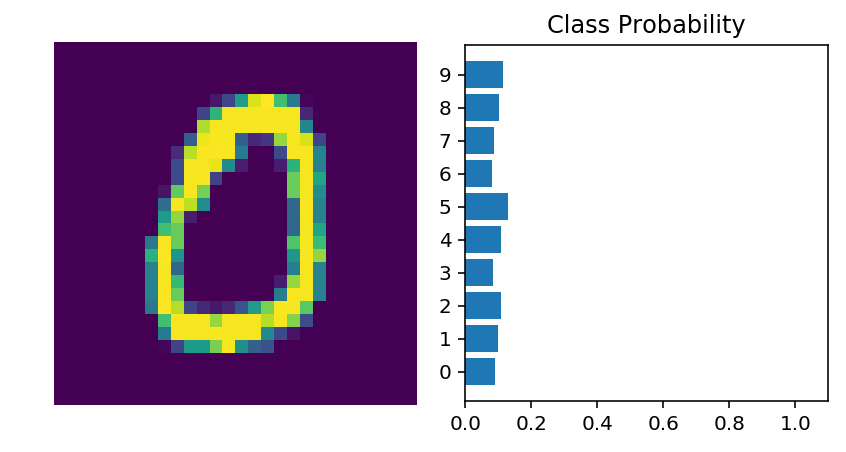

In [42]:
img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

# **nn.Sequential**

In [47]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)

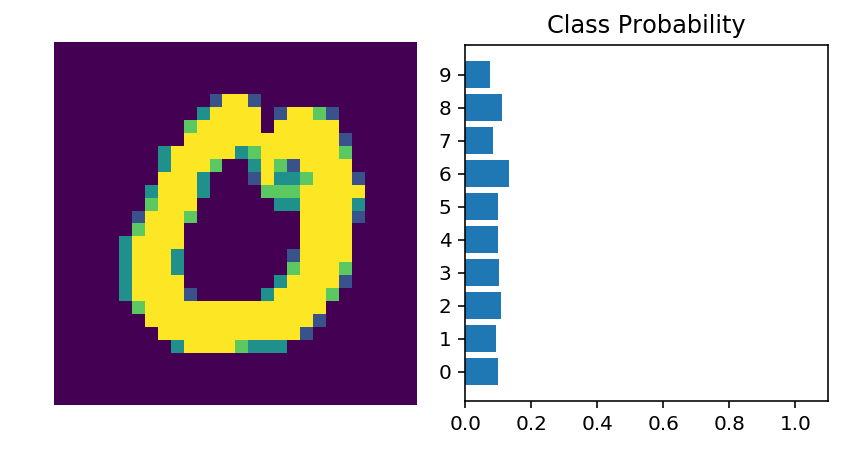

In [48]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [49]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0330,  0.0078,  0.0290,  ...,  0.0299,  0.0300,  0.0022],
        [-0.0040, -0.0250,  0.0335,  ..., -0.0102, -0.0101,  0.0318],
        [ 0.0078,  0.0275, -0.0184,  ..., -0.0017,  0.0083,  0.0199],
        ...,
        [-0.0191,  0.0047,  0.0100,  ..., -0.0208,  0.0197, -0.0159],
        [ 0.0046, -0.0308, -0.0209,  ..., -0.0286,  0.0143, -0.0012],
        [-0.0031,  0.0311, -0.0109,  ..., -0.0151, -0.0195, -0.0270]],
       requires_grad=True)

In [50]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [52]:
model.fc1.weight

Parameter containing:
tensor([[-0.0063,  0.0255, -0.0324,  ..., -0.0135,  0.0213,  0.0102],
        [-0.0248,  0.0105, -0.0274,  ..., -0.0071,  0.0085,  0.0047],
        [-0.0124, -0.0118,  0.0100,  ..., -0.0119, -0.0159,  0.0317],
        ...,
        [ 0.0224, -0.0332, -0.0059,  ...,  0.0356,  0.0127, -0.0126],
        [ 0.0198, -0.0199, -0.0086,  ..., -0.0158,  0.0293,  0.0282],
        [-0.0174, -0.0091, -0.0205,  ...,  0.0081, -0.0333,  0.0093]],
       requires_grad=True)